## Machine Learning Coursework

### Imports

In [9]:
## Import library and set the random seed.
import numpy as np
from sklearn.model_selection import GridSearchCV
from aif360.datasets import AdultDataset
from aif360.algorithms.preprocessing.optim_preproc_helpers.data_preproc_functions import load_preproc_data_adult
from aif360.metrics import ClassificationMetric
from aif360.algorithms.preprocessing.reweighing import Reweighing
from sklearn.model_selection import KFold # import KFold
from aif360.datasets import GermanDataset
import pdb
from sklearn.preprocessing import StandardScaler  #MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import *
import seaborn as sns
from sklearn import metrics  #Confusion Matrix
import pandas as pd
import matplotlib.pyplot as plt
from aif360.datasets import BinaryLabelDataset
from sklearn.ensemble import RandomForestClassifier

np.random.seed(0)


In [2]:
##Note : PLEASE INSTALL BELOW LIB'S IF ANY ERROR POPS UP!!!
! pip install aif360
! pip install fairlearn
! pip install tensorflow
! pip install wget

     |████████████████████████████████| 175 kB 61 kB/s eta 0:00:01
     |████████████████████████████████| 29.1 MB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 433 kB 2.5 MB/s eta 0:00:01
  Created wheel for memory-profiler: filename=memory_profiler-0.60.0-py3-none-any.whl size=31285 sha256=9e0af966c3b3045fb062afd7d7edb7355f083333bcc988c4433c5f6701776e90
  Stored in directory: /Users/jovyjose/Library/Caches/pip/wheels/0c/46/40/2be5888425b5058e7a3205875fda2ecf2219e515ad89dca951
Successfully built memory-profiler
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.1
    Uninstalling scipy-1.7.1:
      Successfully uninstalled scipy-1.7.1


In [13]:
## directory to keep aif360 datasets
cd /opt/anaconda3/lib/python3.9/site-packages/aif360/data/raw/adult

/opt/anaconda3/lib/python3.9/site-packages/aif360/data/raw/adult


In [14]:
## downloading files using wget
import wget

site_url1 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
site_url2 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'
site_url3 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names'
file_name1 = wget.download(site_url1)
file_name2 = wget.download(site_url2)
file_name3 = wget.download(site_url3)

100% [............................................................] 5229 / 5229

### DATA PREPARATION (Adult Dataset)

In [15]:
### creating pandas dataframe for visualiztion
df_aif = pd.DataFrame(load_preproc_data_adult().features)
df_aif.columns=load_preproc_data_adult().feature_names
df_aif

,race,sex,Age (decade)=10,Age (decade)=20,Age (decade)=30,Age (decade)=40,Age (decade)=50,Age (decade)=60,Age (decade)=>=70,Education Years=6,Education Years=7,Education Years=8,Education Years=9,Education Years=10,Education Years=11,Education Years=12,Education Years=<6,Education Years=>12
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48838,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
48839,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
48840,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df_aif.describe()

,race,sex,Age (decade)=10,Age (decade)=20,Age (decade)=30,Age (decade)=40,Age (decade)=50,Age (decade)=60,Age (decade)=>=70,Education Years=6,Education Years=7,Education Years=8,Education Years=9,Education Years=10,Education Years=11,Education Years=12,Education Years=<6,Education Years=>12
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,0.855043,0.668482,0.051390,0.245793,0.264711,0.219565,0.135519,0.062528,0.020495,0.028439,0.037099,0.013452,0.323164,0.222718,0.042197,0.032779,0.052209,0.247942
std,0.352061,0.470764,0.220795,0.430561,0.441184,0.413956,0.342280,0.242115,0.141686,0.166224,0.189007,0.115199,0.467690,0.416075,0.201041,0.178060,0.222451,0.431823
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Splitting dataset (70/30)

In [113]:
## define privileged and non-privileged groups
privileged_groups = [{'sex': 1}]
unprivileged_groups = [{'sex': 0}]
dataset_orig = load_preproc_data_adult(['sex'])


#splitting training and test set.
train, test = dataset_orig.split([0.7], shuffle=True)
print("training data size", train.features.shape)
print("dataset feature names", train.feature_names)

#Normalize the dataset, both train and test.
scale_orig = StandardScaler()
X_train = scale_orig.fit_transform(train.features)
y_train = train.labels.ravel()

X_test = scale_orig.transform(test.features) 
y_test = test.labels.ravel()

training data size (34189, 18)
dataset feature names ['race', 'sex', 'Age (decade)=10', 'Age (decade)=20', 'Age (decade)=30', 'Age (decade)=40', 'Age (decade)=50', 'Age (decade)=60', 'Age (decade)=>=70', 'Education Years=6', 'Education Years=7', 'Education Years=8', 'Education Years=9', 'Education Years=10', 'Education Years=11', 'Education Years=12', 'Education Years=<6', 'Education Years=>12']


## Preliminary Analysis

### Grid Search for optimum C value

In [110]:
## perform grid-search to find best hyperparameter
grid={"C": np.arange(1, 2, 0.001), "penalty":["l2"]}# l1 lasso l2 ridge

logreg_cv=GridSearchCV(LogisticRegression(),grid,n_jobs=-1)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("best score :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
best score : 0.7471428571428571


### Trying GridSearch with finer C Value

In [111]:
## trying grid-search
grid={"C": np.arange(0.01, 1, 0.001), "penalty":["l2"]}# l1 lasso l2 ridge

logreg_cv=GridSearchCV(LogisticRegression(),grid,n_jobs=-1,scoring='accuracy')
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("best score :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.012999999999999998, 'penalty': 'l2'}
best score : 0.75


## LogisticRegression Model

## Task 1

### 5-Fold Cross-Validation

In [18]:
## function implementing 5-fold cross-validation
#Train a standard classifier, compute accuracy and fairness metric (Equal oppurtunity difference)

def accuracy_fold(C=1):
    
    X_train_val = train.features
    y_train_val = train.labels.ravel()
    accuracy_val=[]
    tpr_val=[]
    ### splitting training data into 5-fold using KFold split from scikit-learn
    for k, (train_k, val_k) in enumerate(KFold(5).split(X_train_val)):
    ### using subset method from aif360 dataset
        x_train, x_val = train.subset(train_k), train.subset(val_k)
        ### scaling the features
        x_val_scaled= scale_orig.transform(x_val.features)
        y_val = x_val.labels.ravel()
        ### # instantiate the model (using parameters)
        learner_val = LogisticRegression(C=C,solver='liblinear', random_state=1) 
        # fit the model with data (validation)
        learner_val.fit(X_train_val, y_train_val)
        predictions= learner_val.predict(x_val_scaled)

        test_pred_k = x_val.copy()
        test_pred_k.labels = predictions
        accuracy= sum(predictions== y_val) /len(y_val)
        accuracy_val.append(accuracy)
        ### finding equal oppurtunity metric 
        metric = ClassificationMetric(x_val, test_pred_k, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
        metric_arrs=(metric.equal_opportunity_difference())
        #print("Equal oppurtunity difference in Fold: {} ".format(k+1),metric_arrs)
        tpr_val.append(metric_arrs)
        # Print the average 5-fold cross-validation score
    
    return np.mean(accuracy_val),np.mean(tpr_val)

In [19]:
accuracy_fold(1)

(0.7558571864127466, -0.488622361692161)

### Accuracy & Fairness Metric based on C-value tuning

Text(0.5, 0, 'C value')

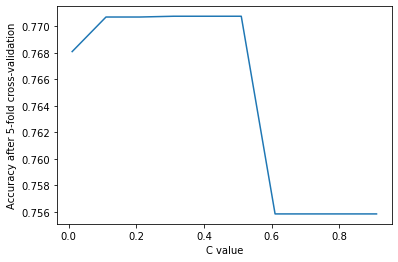

In [20]:
## Plotting Accuracy & C-value using matplot lib
accuracy=[]
r_ange=np.arange(0.01, 1, 0.1)
for i in r_ange:
    x,_=accuracy_fold(i)
    accuracy.append(x)
    
plt.plot(r_ange,accuracy)
plt.ylabel ("Accuracy after 5-fold cross-validation")
plt.xlabel("C value")


## Model 1 : Best Accurate 

In [21]:
## model with best accuracy in 5-folds
accuracy_fold(0.002)

(0.7765072177722313, -0.1556697145023786)

## Model 2 : Best Fairness Metric

Text(0.5, 0, 'C value')

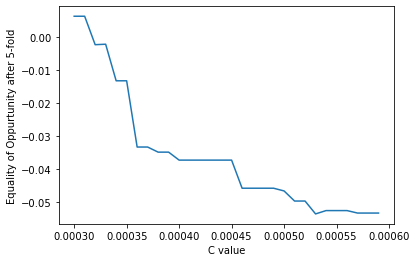

In [22]:
## Plotting Fairness metric & C-value using matplot lib
tpr_kfold=[]
r_ange=np.arange(0.0003, 0.0006, 0.00001)
for i in r_ange:
    _,y=accuracy_fold(i)
    tpr_kfold.append(y)

plt.plot(r_ange,tpr_kfold)
plt.ylabel ("Equality of Oppurtunity after 5-fold")
plt.xlabel("C value")

In [23]:
## model with best fairness metric in 5-folds
accuracy_fold(0.00034)

(0.7537220762943472, -0.01321012837729737)

### Final Evaluation on Test data

### Model 1 - Best Accuracy

In [24]:
## function to visualize and print model values 
def test_data_eval(C=1):
    
    # use best accurate model above to predict Test data
    learner_acc = LogisticRegression(C=C,solver='liblinear', random_state=1)
    learner_acc.fit(X_train,y_train)
    y_pred = learner_acc.predict(X_test)

    # confusion matrix
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    cnf_matrix

    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    ## fairness metric calculation
    test_pred = test.copy()
    y_pred.resize((len(y_pred),1))
    test_pred.labels = y_pred

    metric = ClassificationMetric(test, test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
    metric_arrs=(metric.equal_opportunity_difference())

    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("\nEqual oppurtunity difference :",metric_arrs)


Accuracy: 0.8042039172865625

Equal oppurtunity difference : -0.4414141414141414


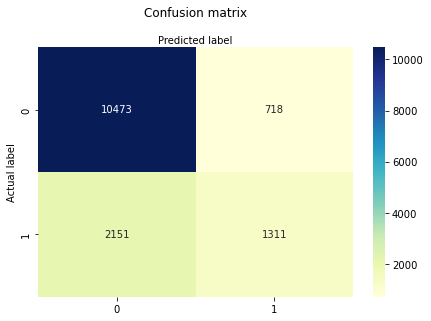

In [25]:
## best accurate model (evaluation on test set)
test_data_eval(0.002)

### Model 2 - Best Fairness

Accuracy: 0.8024295366136628

Equal oppurtunity difference : -0.3635172866880184


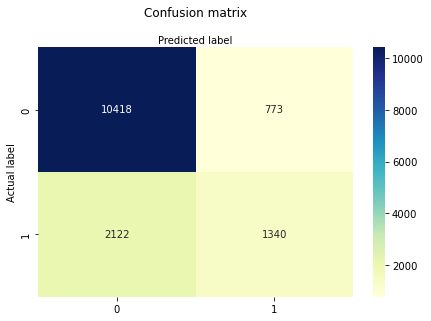

In [26]:
## best fair model (evaluation on test dataset)
test_data_eval(0.00034)

## Task 2 (REWEIGHING)

In [27]:
## function implementing re-weighing

def reweigh_task(C=1):
        
    X_train_val = train.features
    y_train_val = train.labels.ravel()
    accuracy_val=[]
    tpr_val=[]
    ### splitting training data into 5-fold using KFold split from scikit-learn
    for k, (train_k, val_k) in enumerate(KFold(5).split(X_train_val)):
     ### using subset method from aif360 dataset
        x_train, x_val = train.subset(train_k), train.subset(val_k)
     ### scaling the features
        x_val_scaled= scale_orig.transform(x_val.features)
        y_val = x_val.labels.ravel()
        ### Mitigate the bias transforming the original dataset via reweighing.
        RW = Reweighing(unprivileged_groups=unprivileged_groups,
                privileged_groups=privileged_groups)
        ### obtain a set of weights for the training set, to use in scikit-learn.
        train_rw = RW.fit_transform(train)
        ### initialize LogisticRegression and fitting model
        learner_val = LogisticRegression(C=C,solver='liblinear', random_state=1) 
        learner_val.fit(X_train_val, y_train_val,sample_weight=train_rw.instance_weights)
        predictions= learner_val.predict(x_val_scaled)

        test_pred_k = x_val.copy()
        test_pred_k.labels = predictions
        accuracy= sum(predictions== y_val) /len(y_val)
        accuracy_val.append(accuracy)
        ### finding equal oppurtunity metric
        metric = ClassificationMetric(x_val, test_pred_k, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
        metric_arrs=(metric.equal_opportunity_difference())
        tpr_val.append(metric_arrs)
        #print("Average Equal oppurtunity difference in Fold {}: {} ".format((k+1),np.mean(tpr_val)))
        
    return np.mean(accuracy_val),np.mean(tpr_val)

In [28]:
reweigh_task()

(0.7291527489034233, -0.01760728152021753)

## Tuning C value for best Accuracy after Re-weighing

Text(0.5, 0, 'C value')

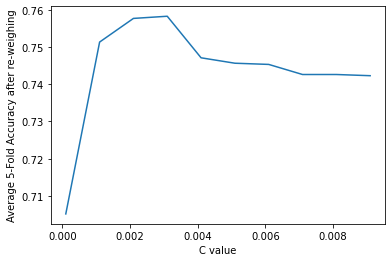

In [29]:
## Plotting Accuracy & C-value after re-weighing
avg_accuracy=[]
r_ange=np.arange(0.0001, 0.01, 0.001)

for i in r_ange:
    x,_=reweigh_task(i)
    avg_accuracy.append(x)
    
plt.plot(r_ange,avg_accuracy)
plt.ylabel ("Average 5-Fold Accuracy after re-weighing")
plt.xlabel("C value")

#plt.legend()

### Model 3 - BEST ACCURACY

In [30]:
## best accurate model in 5-folds after re-weighning
reweigh_task(0.002)

(0.757787656696357, 0.07386288639024527)

## Tuning C value for best Fairness Metric after Re-weighing

Text(0.5, 0, 'C value')

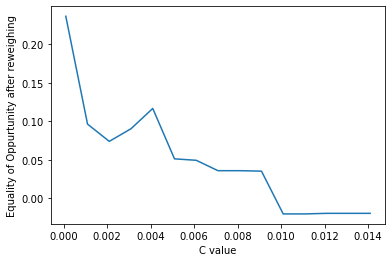

In [31]:
## Plotting Fairness metric & C-value after re-weighning
tpr_diff=[]
r_ange=np.arange(0.0001, 0.015, 0.001)

for i in r_ange:
    _,y=reweigh_task(i)
    tpr_diff.append(y)
      
plt.plot(r_ange,tpr_diff)
plt.ylabel ("Equality of Oppurtunity after reweighing")
plt.xlabel("C value")

#plt.legend()

### Model 4 - BEST Fairness Metric

In [33]:
## best fairness model in 5-folds after re-weighning
reweigh_task(0.01)

(0.7352073304490564, -0.020488426473101073)

## Final Evaluation on Test data

### Model 3 - Best Accuracy

In [34]:
def test_data_eval_reweigh(C=1):
    
    # use best accurate model above to predict Test data
    ## Mitigating bias by transforming the original dataset via reweighing.

    
    RW = Reweighing(unprivileged_groups=unprivileged_groups,
                    privileged_groups=privileged_groups)
    ### obtain a set of weights for the training set, to use in scikit-learn.
    train_rw = RW.fit_transform(train)

    learner_acc = LogisticRegression(C=C,solver='liblinear', random_state=1)
    learner_acc.fit(X_train,y_train,sample_weight=train_rw.instance_weights)
    y_pred = learner_acc.predict(X_test)
    print("Accuracy", sum(y_pred==y_test)/len(y_test))

    # confusion matrix
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    cnf_matrix

    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    ## fairness metric calculation
    test_pred = test.copy()
    y_pred.resize((len(y_pred),1))
    test_pred.labels = y_pred

    metric = ClassificationMetric(test, test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
    metric_arrs=(metric.equal_opportunity_difference())
    #print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("\nEqual oppurtunity difference :",metric_arrs)


Accuracy 0.7905548351873336

Equal oppurtunity difference : 0.03513180586351322


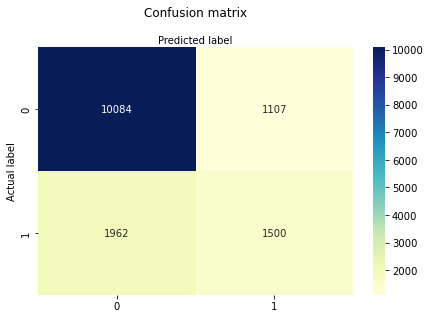

In [35]:
## best accurate model after re-weighning (evaluation on test dataset)
test_data_eval_reweigh(0.004)

### Model 4 - Best Fairness

Accuracy 0.7905548351873336

Equal oppurtunity difference : 0.03513180586351322


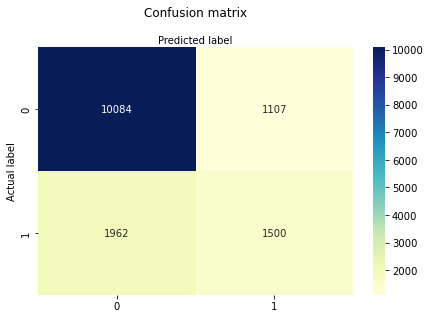

In [37]:
## best fairness model after re-weighning (evaluation on test dataset)
test_data_eval_reweigh(0.01)

# Additional Task

## Random Forest Classifier Model

### Plotting Accuracy & Fairness Metric based on max-depth

Text(0.5, 0, 'Max depth')

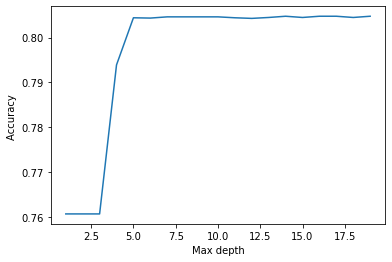

In [114]:
# creating a RF classifier
accuracy_rf=[]
r_ange=np.arange(1, 20, 1)
for i in r_ange:
    learner = RandomForestClassifier(max_depth = i)
    # Training the model on the training dataset
    # fit function is used to train the model using the training sets as parameters
    learner.fit(X_train, y_train)
    # performing predictions on the test dataset
    predictions= learner.predict(X_test)
        
    accuracy=sum(predictions==y_test)/len(y_test)   
    accuracy_rf.append(accuracy)
    
plt.plot(r_ange,accuracy_rf)
plt.ylabel ("Accuracy ")
plt.xlabel("Max depth")


Text(0.5, 0, 'Hyperparameter - Max depth')

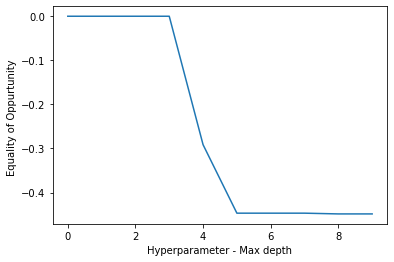

In [116]:
# creating a RF classifier
tpr=[]

r_ange=np.arange(0.001, 10, 1)
for i in r_ange:
    learner = RandomForestClassifier(max_depth = i)
    learner.fit(X_train, y_train)
    predictions= learner.predict(X_test)
    
    test_pred = test.copy()
    test_pred.labels = predictions
    
    ### finding equal oppurtunity metric 
    metric = ClassificationMetric(test, test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
    metric_arrs=(metric.equal_opportunity_difference())
    #print("Equal oppurtunity difference in Fold: {} ".format(k+1),metric_arrs)
    tpr.append(metric_arrs)
    
plt.plot(r_ange,tpr)
plt.ylabel ("Equality of Oppurtunity ")
plt.xlabel("Hyperparameter - Max depth")

## Model 1 : Best Accurate 

In [40]:
# creating a RF classifier
learner = RandomForestClassifier(max_depth =5)
learner.fit(X_train, y_train)
predictions= learner.predict(X_test)

test_pred = test.copy()
test_pred.labels = predictions
    
### finding equal oppurtunity metric 
metric = ClassificationMetric(test, test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
metric_arrs=(metric.equal_opportunity_difference())

        
print("Accuracy", sum(predictions==y_test)/len(y_test))
print("Equal oppurtunity difference ",metric_arrs)

Accuracy 0.7951955231010714
Equal oppurtunity difference  -0.27104377104377103


## Model 2 : Best Fairness Metric

In [41]:
# creating a RF classifier
learner = RandomForestClassifier(max_depth = 1)
learner.fit(X_train, y_train)
predictions= learner.predict(X_test)

test_pred = test.copy()
test_pred.labels = predictions
    
### finding equal oppurtunity metric 
metric = ClassificationMetric(test, test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
metric_arrs=(metric.equal_opportunity_difference())

        
print("Accuracy", sum(predictions==y_test)/len(y_test))
print("Equal oppurtunity difference ",metric_arrs)


Accuracy 0.763734388862349
Equal oppurtunity difference  0.0


# 2nd Dataset, german

In [43]:
cd /opt/anaconda3/lib/python3.9/site-packages/aif360/data/raw/german

/opt/anaconda3/lib/python3.9/site-packages/aif360/data/raw/german


In [44]:
import wget

site_url1 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data'
site_url2 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc'
file_name1 = wget.download(site_url1)
file_name2 = wget.download(site_url2)

100% [............................................................] 4679 / 4679

### DATA PREPARATION (German Dataset)

In [117]:
## define privileged and non-privileged groups
privileged_groups = [{'sex': 1}]
unprivileged_groups = [{'sex': 0}]
dataset_orig = GermanDataset(protected_attribute_names=['sex'])

## split between training and test set.
train, test = dataset_orig.split([0.7], shuffle=True)
print("training data size", train.features.shape)
print("dataset feature names", train.feature_names)

#Normalize the dataset, both train and test. This should always be done in any machine learning pipeline!
scale_orig = StandardScaler()
X_train = scale_orig.fit_transform(train.features)
y_train = train.labels.ravel()

X_test = scale_orig.transform(test.features) 
y_test = test.labels.ravel()


training data size (700, 58)
dataset feature names ['month', 'credit_amount', 'investment_as_income_percentage', 'residence_since', 'age', 'number_of_credits', 'people_liable_for', 'sex', 'status=A11', 'status=A12', 'status=A13', 'status=A14', 'credit_history=A30', 'credit_history=A31', 'credit_history=A32', 'credit_history=A33', 'credit_history=A34', 'purpose=A40', 'purpose=A41', 'purpose=A410', 'purpose=A42', 'purpose=A43', 'purpose=A44', 'purpose=A45', 'purpose=A46', 'purpose=A48', 'purpose=A49', 'savings=A61', 'savings=A62', 'savings=A63', 'savings=A64', 'savings=A65', 'employment=A71', 'employment=A72', 'employment=A73', 'employment=A74', 'employment=A75', 'other_debtors=A101', 'other_debtors=A102', 'other_debtors=A103', 'property=A121', 'property=A122', 'property=A123', 'property=A124', 'installment_plans=A141', 'installment_plans=A142', 'installment_plans=A143', 'housing=A151', 'housing=A152', 'housing=A153', 'skill_level=A171', 'skill_level=A172', 'skill_level=A173', 'skill_lev

In [46]:
df_german = pd.DataFrame(dataset_orig.features)
df_german.columns=dataset_orig.feature_names
df_german

,month,credit_amount,investment_as_income_percentage,residence_since,age,number_of_credits,people_liable_for,sex,status=A11,status=A12,...,housing=A152,housing=A153,skill_level=A171,skill_level=A172,skill_level=A173,skill_level=A174,telephone=A191,telephone=A192,foreign_worker=A201,foreign_worker=A202
0,6.0,1169.0,4.0,4.0,67.0,2.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,48.0,5951.0,2.0,2.0,22.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,12.0,2096.0,2.0,3.0,49.0,1.0,2.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,42.0,7882.0,2.0,4.0,45.0,1.0,2.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,24.0,4870.0,3.0,4.0,53.0,2.0,2.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12.0,1736.0,3.0,4.0,31.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
996,30.0,3857.0,4.0,4.0,40.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
997,12.0,804.0,4.0,4.0,38.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
998,45.0,1845.0,4.0,4.0,23.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [47]:
df_german.describe()

,month,credit_amount,investment_as_income_percentage,residence_since,age,number_of_credits,people_liable_for,sex,status=A11,status=A12,...,housing=A152,housing=A153,skill_level=A171,skill_level=A172,skill_level=A173,skill_level=A174,telephone=A191,telephone=A192,foreign_worker=A201,foreign_worker=A202
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.690000,0.274000,0.269000,...,0.713000,0.108000,0.022000,0.2000,0.630000,0.148000,0.596000,0.404000,0.963000,0.037000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.462725,0.446232,0.443662,...,0.452588,0.310536,0.146757,0.4002,0.483046,0.355278,0.490943,0.490943,0.188856,0.188856
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.0000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.0000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Performing GridSearch

In [213]:
grid={"C": np.arange(0.01, 1, 0.005), "penalty":["l2"]}# l1 lasso l2 ridge

logreg_cv=GridSearchCV(LogisticRegression(),grid,n_jobs=-1)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("best score :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.015, 'penalty': 'l2'}
best score : 0.7585714285714286


## Task 1 

### Visualizing Accuracy & C-Value

Text(0.5, 0, 'C value')

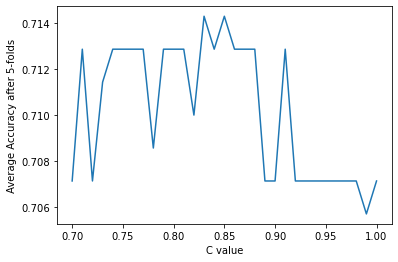

In [86]:
## Plotting Accuracy & C-value using matplot lib
accuracy=[]
r_ange=np.arange(0.7, 1, 0.01)

for i in r_ange:
    x,y=accuracy_fold(i)
    accuracy.append(x) 
    
plt.plot(r_ange,accuracy)
plt.ylabel (" Average Accuracy after 5-folds ")
plt.xlabel("C value")

#plt.legend()

## Model 1 (BEST Accuracy)

In [52]:
## best accuracy model on 5-fold
accuracy_fold(0.85)

(0.7142857142857142, -0.0615351536292648)

### Visualizing C-value & Fariness Metric

Text(0.5, 0, 'C value')

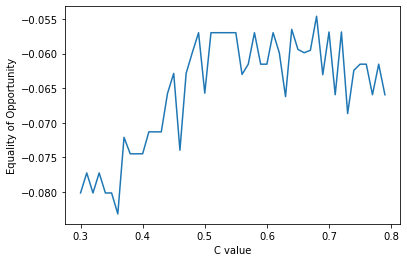

In [87]:
## Plotting Fairness metric & C-value using matplot lib
tpr_kfold=[]
r_ange=np.arange(0.3, 0.8, 0.01)

for i in r_ange:
    x,y=accuracy_fold(i)
    tpr_kfold.append(y)
    
#tpr=r_ange
plt.plot(r_ange,tpr_kfold)
plt.ylabel ("Equality of Opportunity")
plt.xlabel("C value")

## Model 2 (BEST FAIRNESS)

In [80]:
## best fairness model among 5-folds
accuracy_fold(0.7)

(0.7071428571428571, -0.054601008869033095)

### Final Evaluation on Test data

## Model 1 (BEST Accuracy)

Accuracy: 0.7433333333333333

Equal oppurtunity difference : -0.05043859649122806


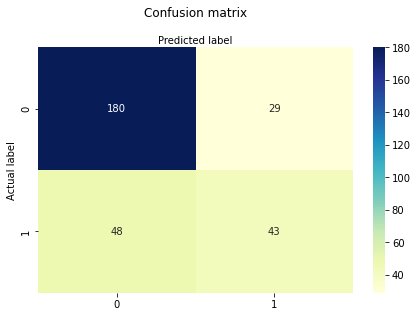

In [57]:
## best accurate model (evaluation on test set)
test_data_eval(0.85)

## Model 2 (BEST FAIRNESS)

Accuracy: 0.74

Equal oppurtunity difference : -0.04385964912280704


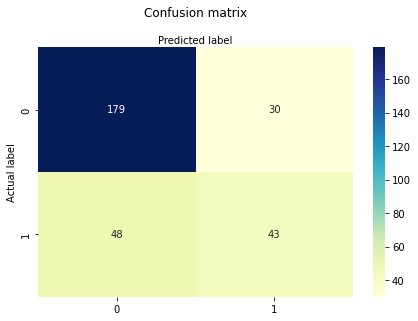

In [81]:
## best fairness model (evaluation on test set)
test_data_eval(0.7)

# Re-weighting (TASK 2)

## Visualizing C-Value & Accuracy( Average 5-fold)

Text(0.5, 0, 'C value')

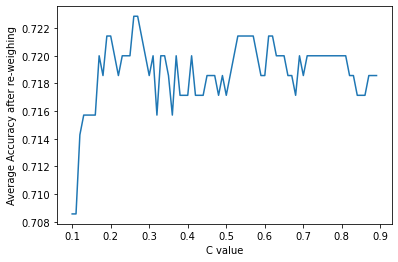

In [82]:
## Plotting Accuracy & C-value after re-weighing
tpr_diff=[]
avg_accuracy=[]
r_ange=np.arange(0.1, 0.9, 0.01)

for i in r_ange:
    x,y=reweigh_task(i)
    avg_accuracy.append(x)
    
plt.plot(r_ange,avg_accuracy)
plt.ylabel ("Average Accuracy after re-weighing")
plt.xlabel("C value")

#plt.legend()

### Model 3 (BEST ACCURACY)

In [88]:
reweigh_task(0.26)

(0.7185714285714285, 0.01117366380230993)

## Visualizing C-Value & Fairness Metric ( Average 5-fold)


Text(0.5, 0, 'C value')

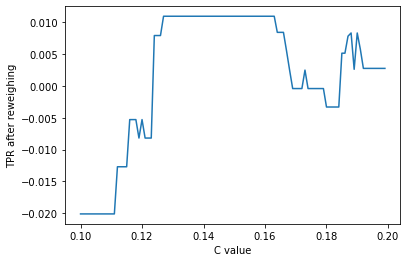

In [93]:
## Plotting Accuracy & C-value after re-weighing
tpr_diff=[]
r_ange=np.arange(0.1, 0.2, 0.001)

for i in r_ange:
    x,y=reweigh_task(i)
    tpr_diff.append(y)
    
plt.plot(r_ange,tpr_diff)
plt.ylabel ("TPR after reweighing")
plt.xlabel("C value")

#plt.legend()

## Model 4 ( BEST FAIRNESS)

In [94]:
reweigh_task(0.12)

(0.7142857142857143, -0.008181557303048769)

## Final Evaluation on Test data

### Model 3 - Best Accuracy

Accuracy 0.7233333333333334

Equal oppurtunity difference : -0.010964912280701733


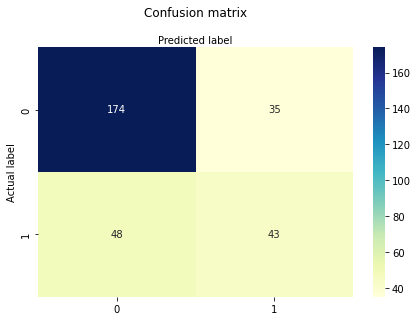

In [95]:
## best accurate model (evaluation on test set)
test_data_eval_reweigh(0.26)

### Model 4 - Best Fairness

Accuracy 0.72

Equal oppurtunity difference : -0.010964912280701733


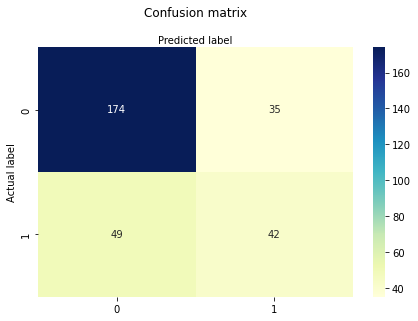

In [96]:
## best fairness model (evaluation on test set)
test_data_eval_reweigh(0.12)

# Additional Task

## Random Forest Classifier Model

### Plotting Accuracy & Fairness Metric based on max-depth

Text(0.5, 0, 'Hyperparameter Max depth')

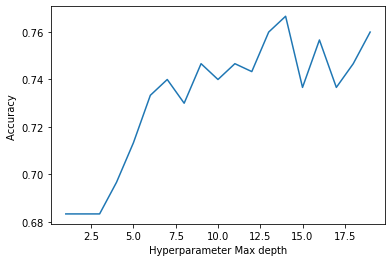

In [121]:
## Plotting Accuracy & C-value using matplot lib
accuracy_rf=[]
r_ange=np.arange(1, 20, 1)
for i in r_ange:
    learner = RandomForestClassifier(max_depth = i)
    learner.fit(X_train, y_train)
    predictions= learner.predict(X_test)
        
    accuracy=sum(predictions==y_test)/len(y_test)   
    accuracy_rf.append(accuracy)
    
plt.plot(r_ange,accuracy_rf)
plt.ylabel ("Accuracy ")
plt.xlabel("Hyperparameter Max depth")


Text(0.5, 0, 'Max depth')

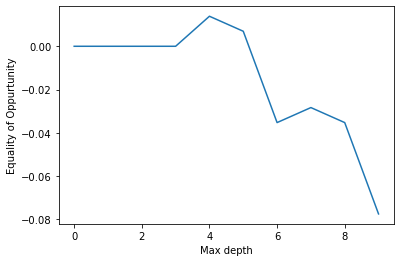

In [120]:
tpr=[]

r_ange=np.arange(0.001, 10, 1)
for i in r_ange:
    learner = RandomForestClassifier(max_depth = i)
    learner.fit(X_train, y_train)
    predictions= learner.predict(X_test)
    
    test_pred = test.copy()
    test_pred.labels = predictions
    
    ### finding equal oppurtunity metric 
    metric = ClassificationMetric(test, test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
    metric_arrs=(metric.equal_opportunity_difference())
    #print("Equal oppurtunity difference in Fold: {} ".format(k+1),metric_arrs)
    tpr.append(metric_arrs)
    
plt.plot(r_ange,tpr)
plt.ylabel ("Equality of Oppurtunity")
plt.xlabel("Max depth")

## Final Evaluation on Test data

## Model 1 : Best Accurate 

In [99]:
## Random Forest classifier
learner = RandomForestClassifier(max_depth = 16)
learner.fit(X_train, y_train)
predictions= learner.predict(X_test)

test_pred = test.copy()
test_pred.labels = predictions
    
### finding equal oppurtunity metric 
metric = ClassificationMetric(test, test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
metric_arrs=(metric.equal_opportunity_difference())

        
print("Accuracy", sum(predictions==y_test)/len(y_test))
print("Equal oppurtunity difference ",metric_arrs)

Accuracy 0.7833333333333333
Equal oppurtunity difference  -0.021929824561403577


## Model 2 : Best Fairness Metric

In [109]:
## Random Forest classifier
learner = RandomForestClassifier(max_depth = 2)
learner.fit(X_train, y_train)
predictions= learner.predict(X_test)

test_pred = test.copy()
test_pred.labels = predictions
    
### finding equal oppurtunity metric 
metric = ClassificationMetric(test, test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
metric_arrs=(metric.equal_opportunity_difference())

        
print("Accuracy", sum(predictions==y_test)/len(y_test))
print("Equal oppurtunity difference ",metric_arrs)

Accuracy 0.7033333333333334
Equal oppurtunity difference  0.0


# Additional Task

### Excluding Sensitive attribute (SEX)

In [172]:
new_aif = BinaryLabelDataset(favorable_label='1',
                                unfavorable_label='0',
                                df=df_aif,
                                label_names= ['sex'],
                                protected_attribute_names=['race'],
                                )

In [173]:
train, test = new_aif.split([0.7], shuffle=True)

In [174]:
print("training data size", train.features.shape)
print("dataset feature names", train.feature_names)

training data size (34189, 17)
dataset feature names ['race', 'Age (decade)=10', 'Age (decade)=20', 'Age (decade)=30', 'Age (decade)=40', 'Age (decade)=50', 'Age (decade)=60', 'Age (decade)=>=70', 'Education Years=6', 'Education Years=7', 'Education Years=8', 'Education Years=9', 'Education Years=10', 'Education Years=11', 'Education Years=12', 'Education Years=<6', 'Education Years=>12']


In [175]:
#Normalize the dataset, both train and test.
scale_orig = StandardScaler()
X_train = scale_orig.fit_transform(train.features)
y_train = train.labels.ravel()

X_test = scale_orig.transform(test.features) 
y_test = test.labels.ravel()

In [177]:
privileged_groups = [{'race': 1}]
unprivileged_groups = [{'race': 0}]

Text(0.5, 0, 'C value')

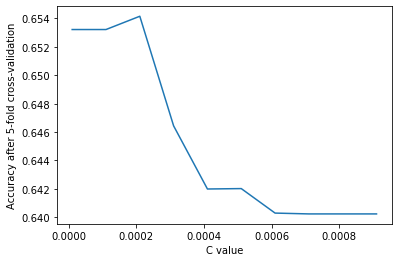

In [184]:
## Plotting Accuracy & C-value using matplot lib
accuracy=[]
r_ange=np.arange(0.00001, 0.001, 0.0001)
for i in r_ange:
    x,_=accuracy_fold(i)
    accuracy.append(x)
    
plt.plot(r_ange,accuracy)
plt.ylabel ("Accuracy after 5-fold cross-validation")
plt.xlabel("C value")


In [200]:
## best accurate model in 5-folds
accuracy_fold(0.002)

(0.6187369380933698, -0.7704506462536079)

Text(0.5, 0, 'C value')

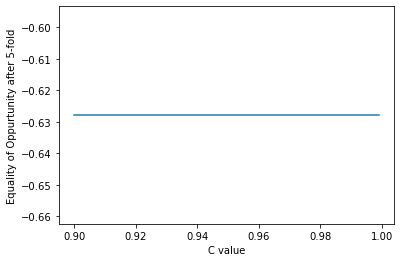

In [192]:
## Plotting Fairness metric & C-value using matplot lib
tpr_kfold=[]
r_ange=np.arange(0.9, 1, 0.001)
for i in r_ange:
    _,y=accuracy_fold(i)
    tpr_kfold.append(y)

plt.plot(r_ange,tpr_kfold)
plt.ylabel ("Equality of Oppurtunity after 5-fold")
plt.xlabel("C value")

In [203]:
## best fairness model in 5 folds
accuracy_fold(0.99)

(0.5993447683691053, -0.6278697422381996)

Accuracy: 0.6673718692417935

Equal oppurtunity difference : -0.28056885754420524


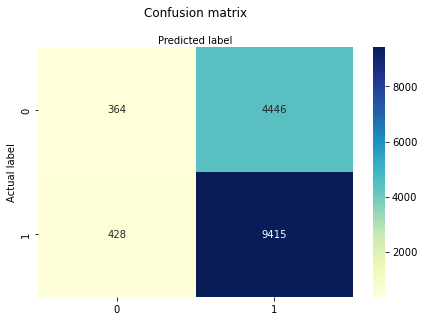

In [202]:
## best accurate model (evaluation on test set)
test_data_eval(0.002)

Accuracy: 0.6681225687572511

Equal oppurtunity difference : -0.26543008546682934


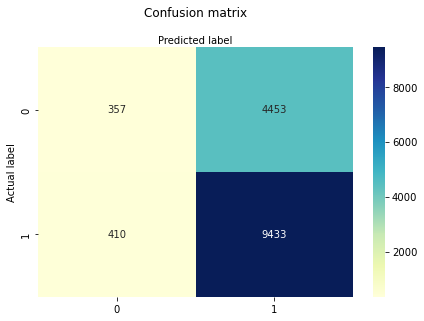

In [205]:
## best fairness model (evaluation on test set)
test_data_eval(0.099)

Text(0.5, 0, 'C value')

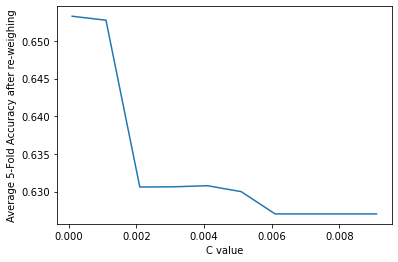

In [191]:
## Plotting Accuracy & C-value after re-weighing
avg_accuracy=[]
r_ange=np.arange(0.0001, 0.01, 0.001)

for i in r_ange:
    x,_=reweigh_task(i)
    avg_accuracy.append(x)
    
plt.plot(r_ange,avg_accuracy)
plt.ylabel ("Average 5-Fold Accuracy after re-weighing")
plt.xlabel("C value")

#plt.legend()

In [194]:
reweigh_task(0.001)

(0.6527828788721349, -0.3338415791157619)

Text(0.5, 0, 'C value')

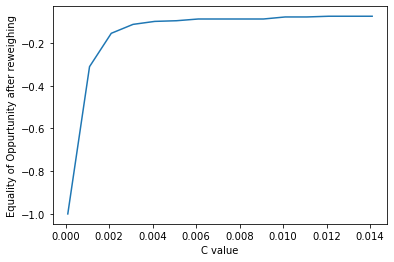

In [195]:
## Plotting Fairness metric & C-value after re-weighning
tpr_diff=[]
r_ange=np.arange(0.0001, 0.015, 0.001)

for i in r_ange:
    _,y=reweigh_task(i)
    tpr_diff.append(y)
      
plt.plot(r_ange,tpr_diff)
plt.ylabel ("Equality of Oppurtunity after reweighing")
plt.xlabel("C value")

#plt.legend()

In [199]:
reweigh_task(0.01)

(0.6271606034693374, -0.07812312343262243)

Accuracy: 0.6723537842080121

Equal oppurtunity difference : -0.0010031482255005164


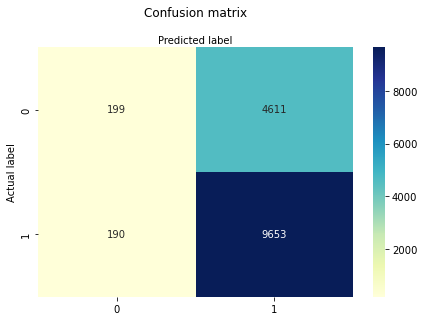

In [206]:
## best accurate model after re-weighing (evaluation on test set)
test_data_eval_reweigh(0.001)

Accuracy: 0.6723537842080121

Equal oppurtunity difference : -0.0010031482255005164


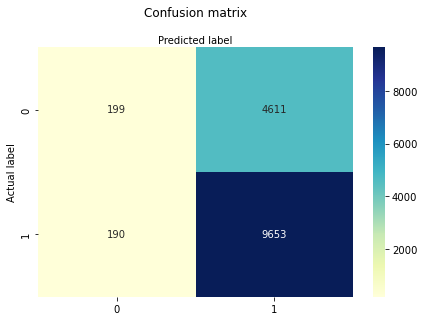

In [207]:
## best fairness model after reweighing(evaluation on test set)
test_data_eval_reweigh(0.01)